Mardown cheat cheat : https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#blockquotes

#### Project Milestone3 - Group Concatsanddogs

### The use of women's rights and gender equality rhetoric in the US

# Research Question 2 :

**Is there a relationship between the association of women's rights and elements of nationalist rhetoric and the speaker political orientation?**

**Is there a relationship between the femonationalist use of women's right rhetoric and speaker gender?**

## Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

In [2]:
sns.set_theme(rc={'figure.figsize':(20,3)})
sns.set_style("whitegrid")

In [3]:
PATH_GENERATED_DATA = 'generated_data/'

## Loading the selected quotes dataframe

In [5]:
# loading the dataframe with only the selected quotes
dataframesNames = ('QOI_2015_DF','QOI_2016_DF','QOI_2017_DF','QOI_2018_DF','QOI_2019_DF','QOI_2020_DF')
# Concatenate into one dataframes the dataframes from each pickle file. 
df = pd.concat([pd.read_pickle(PATH_GENERATED_DATA+ fp +'.pkl') for fp in dataframesNames], ignore_index=True)

In [6]:
df.head(2)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2015-03-09-004706,Anything less than women winning 50 per cent o...,Katy Gallagher,[Q463507],2015-03-09 12:30:00,1,"[[Katy Gallagher, 0.5872], [None, 0.4128]]",[http://www.smh.com.au/act-news/women-need-to-...,E
1,2015-04-24-025718,I'd like to congratulate all the winners and f...,Helena Morrissey,[Q23762081],2015-04-24 15:33:00,1,"[[Helena Morrissey, 0.8706], [None, 0.1294]]",[http://www.cipd.co.uk/PM/peoplemanagement/b/w...,E


In [7]:
# loading the dataframe with selected quotes and additional attributes
df_enriched = pd.read_pickle(PATH_GENERATED_DATA+'df_enriched.pkl', compression='infer', storage_options=None)

In [8]:
df_enriched.head(2)

,quoteID,quotation,speaker,date,numOccurrences,probas,urls,aliases,date_of_birth,nationality,...,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,label,candidacy,type,religion
0,2015-03-09-004706,Anything less than women winning 50 per cent o...,Katy Gallagher,2015-03-09 12:30:00,1,"[[Katy Gallagher, 0.5872], [None, 0.4128]]",[http://www.smh.com.au/act-news/women-need-to-...,"[Katherine Gallagher, Katherine Ruth Gallagher]",[+1970-03-17T00:00:00Z],Australia,...,1349152158,NaN,None,politician,Australian Labor Party,NaN,Katy Gallagher,None,item,NaN
1,2017-05-11-081817,"more family-friendly and flexible workplaces, ...",Katy Gallagher,2017-05-11 00:00:37,1,"[[Katy Gallagher, 0.5596], [None, 0.4404]]",[http://www.mediamaxnetwork.co.ke/news/325569/...,"[Katherine Gallagher, Katherine Ruth Gallagher]",[+1970-03-17T00:00:00Z],Australia,...,1349152158,NaN,None,politician,Australian Labor Party,NaN,Katy Gallagher,None,item,NaN


In [9]:
df.head(2)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2015-03-09-004706,Anything less than women winning 50 per cent o...,Katy Gallagher,[Q463507],2015-03-09 12:30:00,1,"[[Katy Gallagher, 0.5872], [None, 0.4128]]",[http://www.smh.com.au/act-news/women-need-to-...,E
1,2015-04-24-025718,I'd like to congratulate all the winners and f...,Helena Morrissey,[Q23762081],2015-04-24 15:33:00,1,"[[Helena Morrissey, 0.8706], [None, 0.1294]]",[http://www.cipd.co.uk/PM/peoplemanagement/b/w...,E


## Generating a wordcloud

In [54]:
from wordcloud import WordCloud, STOPWORDS

def word_cloud(df_wordcloud):
    
    comment_words = ''
    stopwords = set(nltk.corpus.stopwords.words('english'))
    
    for sent in df_wordcloud:

        tokens = sent.split()

        # lowercasing
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 2500, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
                   
    plt.figure(figsize = (20,10), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [55]:
df['quotation']

0        Anything less than women winning 50 per cent o...
1        I'd like to congratulate all the winners and f...
2        I think what Deepika has spoken in the video m...
3        if advocating for equal pay for equal work is ...
4        Men and women are understandably upset if they...
                               ...                        
87156    McGlone went further to order [ De Leon ] that...
87157    As part of our efforts, we have strengthened t...
87158    `Knots' did that way back when. But, we were a...
87159    Men and women are much more likely to be satis...
87160    To sign this with the government, this ten mil...
Name: quotation, Length: 87161, dtype: object

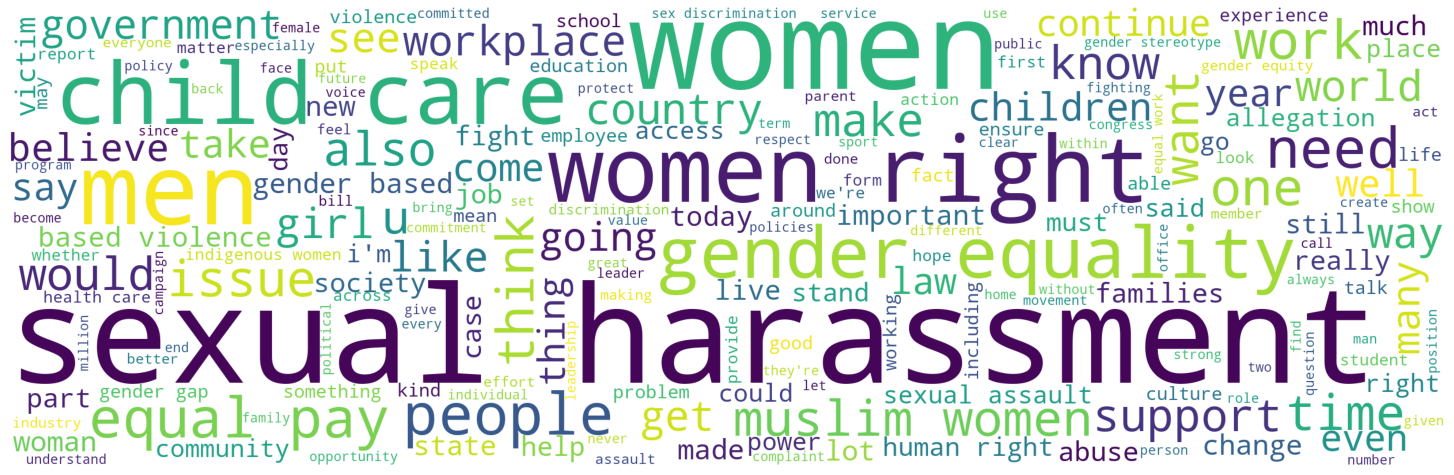

In [56]:
word_cloud(df['quotation']) # maybe not a relevant picture since the keywords we used to get the quotes will appear here?

# Sub question 1 :  **Is there a relationship between the association of women's rights and elements of nationalist rhetoric and the speaker political orientation?**

In [10]:
df_enriched.columns

Index(['quoteID', 'quotation', 'speaker', 'date', 'numOccurrences', 'probas',
       'urls', 'aliases', 'date_of_birth', 'nationality', 'gender',
       'lastrevid', 'ethnic_group', 'US_congress_bio_ID', 'occupation',
       'party', 'academic_degree', 'label', 'candidacy', 'type', 'religion'],
      dtype='object')

In [11]:
df_enriched['party'].nunique()

589

In [12]:
df_enriched['party'].unique()

array(['Australian Labor Party', nan, 'Democratic Party',
       'Liberal Party of Australia', 'Republican Party',
       'Liberal Party of Canada', 'Alberta Liberal Party',
       'independent politician',
       'Communist Party of India (Marxist–Leninist) Liberation',
       'African National Congress', 'National Party of Australia – NSW',
       'New Zealand National Party',
       'Minnesota Democratic–Farmer–Labor Party',
       'National Democratic Congress', 'Justice and Development Party',
       'New Democratic Party', 'Democratic Action Party',
       'Fiji First Party', 'Liberty Union Party',
       'New Democratic Party of Manitoba', 'Ontario Liberal Party',
       'Bulgarian Socialist Party', 'Bharatiya Janata Party',
       'Conservative Party of Canada', 'Truth and Justice Party',
       'Socialist Party', 'Worker-communist Party of Iran',
       'Labour Party', 'Indian National Congress',
       'Progressive Conservative Association of Alberta',
       'Communist Party

In [13]:
df_grouped_by_partyname = df.groupby(df_enriched.party)

In [14]:
df.groupby(df_enriched.party).size().sort_values(ascending=False)

party
Democratic Party                  8783
Republican Party                  3594
Bharatiya Janata Party            1083
Liberal Party of Canada           1024
Labour Party                       525
                                  ... 
Mazingira Green Party of Kenya       1
Religious Zionist Party              1
Republican Left of Catalonia         1
One NL                               1
Respect Party                        1
Length: 589, dtype: int64

In [15]:
Democrat_quotes = df_enriched.query('party == "Democratic Party" ')
Republican_quotes = df_enriched.query('party == "Republican Party" ')

In [16]:
Democrat_quotes.head(3)

,quoteID,quotation,speaker,date,numOccurrences,probas,urls,aliases,date_of_birth,nationality,...,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,label,candidacy,type,religion
23,2015-09-11-052815,if advocating for equal pay for equal work is ...,Hillary Clinton,2015-09-11 14:17:08,1,"[[Hillary Clinton, 0.8831], [None, 0.1105], [D...",[http://www.wrn.com/2015/09/hillary-clinton-ra...,"[Hillary Rodham Clinton, Hillary Rodham, Hilla...",[+1947-10-26T00:00:00Z],United States of America,...,1393846565,NaN,C001041,politician,Democratic Party,bachelor's degree,Hillary Clinton,"[Q699872, Q4791768]",item,Methodism
24,2015-04-13-014571,Family planning is an important part of women'...,Hillary Clinton,2015-04-13 14:50:08,1,"[[Hillary Clinton, 0.8293], [None, 0.1707]]",[https://unicornbooty.com/where-hillary-clinto...,"[Hillary Rodham Clinton, Hillary Rodham, Hilla...",[+1947-10-26T00:00:00Z],United States of America,...,1393846565,NaN,C001041,politician,Democratic Party,bachelor's degree,Hillary Clinton,"[Q699872, Q4791768]",item,Methodism
25,2015-03-04-106558,We're not doing that when the hard work of wom...,Hillary Clinton,2015-03-04 04:21:39,1,"[[Hillary Clinton, 0.9136], [None, 0.0864]]",[http://thehill.com/blogs/ballot-box/president...,"[Hillary Rodham Clinton, Hillary Rodham, Hilla...",[+1947-10-26T00:00:00Z],United States of America,...,1393846565,NaN,C001041,politician,Democratic Party,bachelor's degree,Hillary Clinton,"[Q699872, Q4791768]",item,Methodism


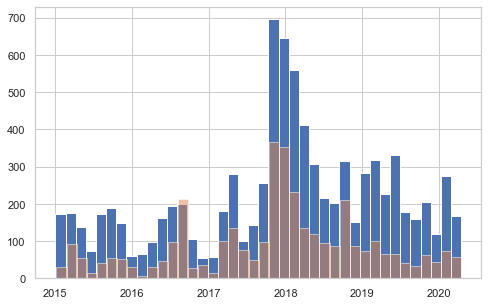

In [17]:
Democrat_quotes['date'].hist(bins=40, figsize = [8,5])
Republican_quotes['date'].hist(bins=40, figsize = [8,5],alpha=0.5)
plt.show()

# Sub-question 2 : **Is there a relationship between the femonationalist use of women's right rhetoric and speaker gender?**

### Quotes in function of time and gender

In [18]:
df_enriched['gender'].nunique()

11

In [19]:
df_enriched['gender'].unique()

array(['female', 'male', nan, 'non-binary', 'transgender female',
       'genderfluid', 'cisgender female', 'transgender male',
       'cisgender male', 'genderqueer', 'shemale', 'intersex'],
      dtype=object)

In [20]:
df_enriched.groupby(df_enriched.gender).size().sort_values(ascending=False)

gender
female                28286
male                  26274
transgender female       89
non-binary               80
genderfluid              26
transgender male         21
cisgender female         15
genderqueer               4
shemale                   3
intersex                  2
cisgender male            1
dtype: int64

Most of the data is from the male and female genders, so we will currently base our analysis on those two genders :

In [21]:
female_quotes = df_enriched.query('gender == "female" ')
male_quotes = df_enriched.query('gender == "male" ')

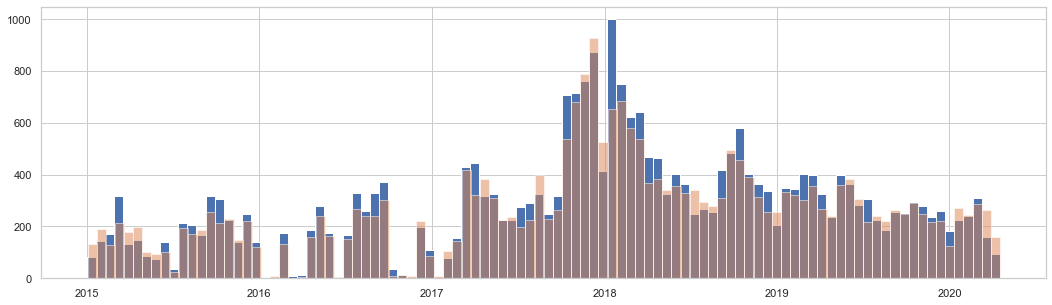

In [22]:
female_quotes['date'].hist(bins = 100, figsize = [18,5])
male_quotes['date'].hist(bins = 100, figsize = [18,5],alpha =0.5)
plt.show()